# Read USGS GWL data

This script is meant to convert the JSON file from a usgs well database (https://waterdata.usgs.gov/monitoring-location/293352095011601/#parameterCode=72019&showMedian=true&startDT=1995-01-01&endDT=2017-01-01) into a workable CSV file.

In [1]:
import pandas as pd

df = pd.read_json('./data/gwl_texas.json')

convert JSON file to pandas dataframe

In [5]:
data = []
# Loop over each dataStream
for dataStream in df["properties"].dataStreams:
    # Loop over each observation in the dataStream
    for observation in dataStream['observations']:
        # Extract phenomenonTime and result
        phenomenonTime = observation['phenomenonTime']
        date = pd.to_datetime(phenomenonTime)
        result = float(observation['result'])
        # convert results from feet to meters
        result = result * 0.3048
        # Append the extracted data to the list
        data.append({'Date': date, 'DistanceFromSurface': result})
    break

# # Convert the list to a pandas DataFrame
df2 = pd.DataFrame(data)

# Convert phenomenonTime to datetime object with just year-month-day
df2['Date'] = pd.to_datetime(df2['Date']).dt.date

# Sort the DataFrame by the 'Date' column
df2 = df2.sort_values(by='Date')
# Reset the index of the DataFrame
df2 = df2.reset_index(drop=True)



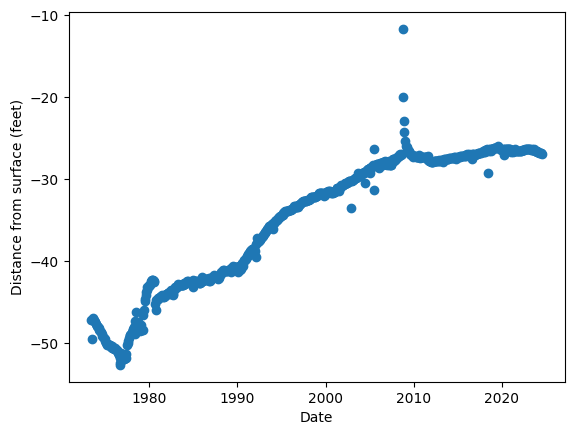

In [6]:
import matplotlib.pyplot as plt
plt.plot_date(df2['Date'], df2['DistanceFromSurface'])
plt.xlabel('Date')
plt.ylabel('Distance from surface (meters)')
plt.grid()
plt.title('Groundwater Level in Texas')
plt.show()

Add the dv/v time series

In [7]:
# this wioll read in data/Kim_lekic folder reading the .dat files as a pandas dataframe

import os
import pandas as pd
 
dv = pd.read_csv('/Users/marinedenolle/GIT_REPOS/dvv-hydro-CompGeo-review-2024/data/Kim_Lekic_2019_Seismic_velocity_perturbations_from_ambient_noise/1dv_v_BHE_PWS.dat', sep='\s+', header=None, names=['time', 'x', 'y', 'z'])

In [8]:
dv

,time,x,y,z
0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN,NaN,NaN
1,"-0.0018182,-0.0014141,-0.0018182,0.02,-0.00181...",NaN,NaN,NaN
2,"-0.00020202,-0.0014141,-0.0018182,-0.0018182,-...",NaN,NaN,NaN
3,"-0.0010101,-0.0014141,-0.0010101,-0.0018182,0....",NaN,NaN,NaN
4,"0,0,0,0,0,0,-0.0094949,-0.00060606,0,0,0,0,0,0...",NaN,NaN,NaN
5,"-0.0018182,-0.0018182,0.02,0.02,0.02,0.02,0.02...",NaN,NaN,NaN
6,"0.0018182,-0.00060606,-0.00020202,0.00020202,-...",NaN,NaN,NaN
7,"0.0026263,0.0022222,0.0022222,0.0022222,0.0018...",NaN,NaN,NaN
8,"-0.0014141,0.02,0.0086869,0.00060606,0.0002020...",NaN,NaN,NaN
9,"-0.0018182,0.0022222,0.0022222,0.0038384,0.003...",NaN,NaN,NaN


## Read the Clements&Denolle data

In [10]:
dvv_clements = pd.read_csv('/Users/marinedenolle/GIT_REPOS/dvv-hydro-CompGeo-review-2024/data/Clements_Denolle_2018/clements-denolle-grl-2018-figure-2.csv')

In [11]:
dvv_clements

,time,dvv,gwl
0,2000-01-01,-0.051872,70.908261
1,2000-01-02,-0.053723,70.898545
2,2000-01-03,-0.055540,70.888987
3,2000-01-04,-0.057322,70.879587
4,2000-01-05,-0.059071,70.870344
...,...,...,...
6357,2017-05-28,0.003362,55.293608
6358,2017-05-29,0.003267,55.276340
6359,2017-05-30,0.003178,55.258698
6360,2017-05-31,0.003095,55.240681


In [21]:
time_color

0        946684800000000000
1        946771200000000000
2        946857600000000000
3        946944000000000000
4        947030400000000000
               ...         
6357    1495929600000000000
6358    1496016000000000000
6359    1496102400000000000
6360    1496188800000000000
6361    1496275200000000000
Name: time, Length: 6362, dtype: int64

[[0.267004 0.004874 0.329415 1.      ]
 [0.267004 0.004874 0.329415 1.      ]
 [0.267004 0.004874 0.329415 1.      ]
 ...
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


ValueError: s must be a scalar, or float array-like with the same size as x and y

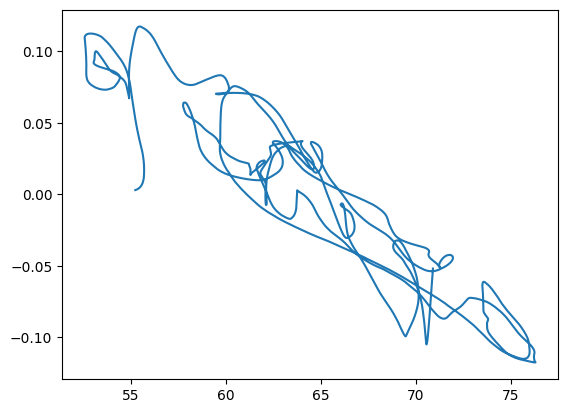

In [31]:
import numpy as np
plt.plot(dvv_clements['gwl'],dvv_clements['dvv'])
# convert the time to a colorscale
time_color = np.array(pd.to_datetime(dvv_clements['time']).astype(int))
# Normalize the time_color array by its maximum value
time_color = time_color / time_color.max()
ccscale = plt.cm.ScalarMappable(cmap='viridis')
# make sure each value of dvv_clements has a color associated with it
# Make sure each value of dvv_clements has a color associated with it
dv_color = ccscale.to_rgba(time_color)
# colormark the scatter plot with the time
plt.scatter(dvv_clements['gwl'],dvv_clements['dvv'], 'o', color=dv_color)